<a href="https://colab.research.google.com/github/bkvkrll/Data-analysis-algorithms/blob/main/lesson2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [4]:
X[:, 1].min(), X[:, 1].max()

(0, 10)

In [5]:
X[:, 2].min(), X[:, 2].max()

(450, 2000)

In [6]:
def min_max_scale(X):
    return (X - X.min()) / (X.max() - X.min())

In [7]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 5.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

In [8]:
X_norm[:, 1] = min_max_scale(X_norm[:, 1])
X_norm[:, 2] = min_max_scale(X_norm[:, 2])
X_norm[:, 3] = min_max_scale(X_norm[:, 3])
X_norm

array([[1.        , 0.1       , 0.03225806, 0.        ],
       [1.        , 0.1       , 0.16129032, 0.        ],
       [1.        , 0.2       , 0.19354839, 0.5       ],
       [1.        , 0.5       , 0.09677419, 0.        ],
       [1.        , 0.3       , 0.64516129, 0.5       ],
       [1.        , 0.        , 0.22580645, 0.        ],
       [1.        , 0.5       , 0.67741935, 1.        ],
       [1.        , 1.        , 1.        , 1.        ],
       [1.        , 0.1       , 0.        , 0.        ],
       [1.        , 0.2       , 0.35483871, 0.5       ]])

In [9]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [10]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

In [11]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [12]:
W = np.random.randn(X.shape[1])
W

array([ 0.21462724, -0.65392409, -0.18680686, -1.00360602])

In [13]:
def gradient_descent(X, y, iterations, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        W -= (eta * dQ)
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [14]:
gradient_descent(X_st, y, iterations=5000, eta=1e-2)

Iter: 0, weights: [ 3.50159823 -1.15378777  0.02972592 -0.26336628], error 3134.8951422805817
Iter: 500, weights: [56.49782579  5.86420252  1.25939126  5.33710283], error 25.351797506522225
Iter: 1000, weights: [56.49999991  6.17953167  0.2143877   6.10544116], error 24.961845582448078
Iter: 1500, weights: [56.5         6.26037931 -0.15149576  6.40261894], error 24.912031196110146
Iter: 2000, weights: [56.5         6.28780898 -0.28266761  6.5106407 ], error 24.905579196765935
Iter: 2500, weights: [56.5         6.29759657 -0.32985496  6.54957621], error 24.90474329394594
Iter: 3000, weights: [56.5         6.30111516 -0.34683827  6.56359348], error 24.904634996121843
Iter: 3500, weights: [56.5         6.30238142 -0.3529512   6.56863902], error 24.904620965280277
Iter: 4000, weights: [56.5         6.30283719 -0.3551515   6.57045512], error 24.904619147473515
Iter: 4500, weights: [56.5         6.30300124 -0.35594348  6.57110882], error 24.90461891196225
Final MSE: 24.90461888144989


array([56.5       ,  6.30306022, -0.35622821,  6.57134384])

In [15]:
def stohastic_gradient_descent(X, y, iterations, batch_size, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    n_batch = n // batch_size    
    if n % batch_size != 0:
        n_batch += 1
    print(f'amount of batches is {n_batch}')
        
    for i in range(0, iterations):
        
        for b in range(n_batch):
            start = batch_size * b
            end = batch_size * (b + 1)
            
#             print(b, start, end)
            
            X_tmp = X[start : end, ]
            y_tmp = y[start : end]

            err = calc_mse(y, np.dot(X, W))
            
            y_pred_tmp = np.dot(X_tmp, W)
            dQ = 2/len(y_tmp) * X_tmp.T @ (y_pred_tmp - y_tmp) # градиент функции ошибки
            W -= (eta * dQ)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [16]:
stohastic_gradient_descent(X_st, y, iterations=5000, batch_size=4, eta=1e-2)

amount of batches is 3
Iter: 0, weights: [ 2.99533654 -0.14717702  2.15236027  0.55428877], error 3073.3463989627735
Iter: 500, weights: [57.06361875  6.04775768 -0.6443798   6.85288013], error 25.229578582384196
Iter: 1000, weights: [57.05326172  6.12095317 -0.95328711  7.10480759], error 25.262767128865242
Iter: 1500, weights: [57.05252511  6.12605992 -0.97512977  7.12268553], error 25.26640821346766
Iter: 2000, weights: [57.05247297  6.12642135 -0.97667577  7.12395092], error 25.26667234300687
Iter: 2500, weights: [57.05246928  6.12644693 -0.97678519  7.12404048], error 25.266691069934875
Iter: 3000, weights: [57.05246902  6.12644874 -0.97679294  7.12404682], error 25.266692395566924
Iter: 3500, weights: [57.052469    6.12644887 -0.97679348  7.12404727], error 25.26669248939445
Iter: 4000, weights: [57.052469    6.12644888 -0.97679352  7.1240473 ], error 25.266692496035464
Iter: 4500, weights: [57.052469    6.12644888 -0.97679352  7.1240473 ], error 25.26669249650552
Final MSE: 25.3

array([57.052469  ,  6.12644888, -0.97679353,  7.1240473 ])

In [17]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [18]:
gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-2, reg=1e-4)

Iter: 0, weights: [ 0.23613287  1.12048507 -1.87278471  0.14211942], error 3486.0984291338477
Iter: 500, weights: [56.49486827  6.07022698  0.66670206  5.7467448 ], error 25.087348138907316
Iter: 1000, weights: [5.64971750e+01 6.22564289e+00 1.08297458e-02 6.26946175e+00], error 24.92841209029044
Iter: 1500, weights: [56.49717514  6.2750991  -0.22309963  6.46159246], error 24.90776557345422
Iter: 2000, weights: [56.49717514  6.29256134 -0.30715463  6.53092217], error 24.905055238601996
Iter: 2500, weights: [56.49717514  6.29882669 -0.33738907  6.55587498], error 24.904690708476988
Iter: 3000, weights: [56.49717514  6.30107986 -0.34826597  6.56485258], error 24.904638585800047
Iter: 3500, weights: [56.49717514  6.30189042 -0.35217905  6.5680824 ], error 24.904630061625998
Iter: 4000, weights: [56.49717514  6.30218202 -0.35358682  6.56924437], error 24.904628318690133
Iter: 4500, weights: [56.49717514  6.30228693 -0.35409328  6.5696624 ], error 24.904627862977463
Final MSE: 24.9046277212

array([56.49717514,  6.30232463, -0.35427528,  6.56981262])

In [19]:
gradient_descent(X_st, y, iterations=5000, eta=1e-1)

Iter: 0, weights: [11.71769472  1.72836323  1.86478501  2.83887725], error 3292.370572223185
Iter: 500, weights: [56.5         6.30306857 -0.35626855  6.57137713], error 24.904618879562488
Iter: 1000, weights: [56.5         6.30309349 -0.35638885  6.57147642], error 24.90461887690841
Iter: 1500, weights: [56.5         6.30309349 -0.35638885  6.57147643], error 24.90461887690837
Iter: 2000, weights: [56.5         6.30309349 -0.35638885  6.57147643], error 24.904618876908394
Iter: 2500, weights: [56.5         6.30309349 -0.35638885  6.57147643], error 24.904618876908394
Iter: 3000, weights: [56.5         6.30309349 -0.35638885  6.57147643], error 24.904618876908394
Iter: 3500, weights: [56.5         6.30309349 -0.35638885  6.57147643], error 24.904618876908394
Iter: 4000, weights: [56.5         6.30309349 -0.35638885  6.57147643], error 24.904618876908394
Iter: 4500, weights: [56.5         6.30309349 -0.35638885  6.57147643], error 24.904618876908394
Final MSE: 24.904618876908394


array([56.5       ,  6.30309349, -0.35638885,  6.57147643])

1. Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод

In [20]:
n = 21
cf = np.zeros((n, X_st.shape[1]))
lambda_list = np.logspace(-3, 1, n)
for i, val in enumerate(lambda_list):
    W = gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-4)
    cf[i, :] = W
    

Iter: 0, weights: [ 0.59786164  0.27090027  1.37852034 -0.39621203], error 3262.193073916553
Iter: 500, weights: [5.91815935 1.13258623 2.18167604 0.46808304], error 2652.475329333253
Iter: 1000, weights: [10.73211565  1.8076641   2.78688061  1.13829093], error 2162.880372154723
Iter: 1500, weights: [15.08791987  2.33861786  3.23968077  1.65894287], error 1767.732707565654
Iter: 2000, weights: [19.02917509  2.75820505  3.57518418  2.06436349], error 1447.5936633922151
Iter: 2500, weights: [22.59533462  3.09168509  3.82045127  2.38100951], error 1187.4887571721029
Iter: 3000, weights: [25.82209693  3.35853705  3.99633914  2.62927253], error 975.7168982070427
Iter: 3500, weights: [28.741763    3.5737838   4.11892291  2.82486879], error 803.0302574429898
Iter: 4000, weights: [31.38355969  3.74901285  4.20059144  2.97991047], error 662.054802106154
Iter: 4500, weights: [33.77393228  3.89316326  4.25089201  3.10373162], error 546.870542942235
Final MSE: 452.7003609546638
Iter: 0, weights: [

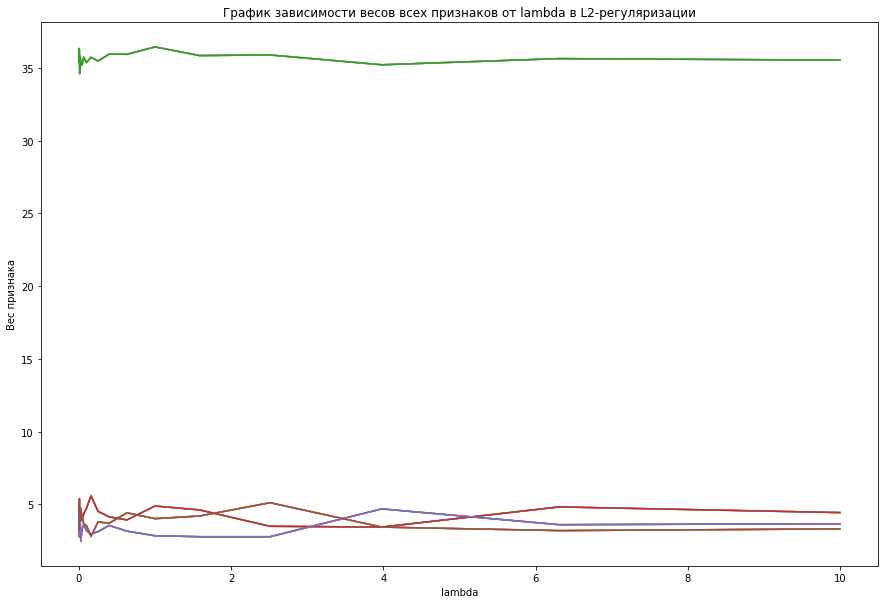

In [21]:
plt.figure(figsize=(15, 10))
for i in range(X_st.shape[1]):
    plt.plot(lambda_list, cf)
plt.title('График зависимости весов всех признаков от lambda в L2-регуляризации')
plt.xlabel('lambda')
plt.ylabel('Вес признака');

2. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [29]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        if 0 in W:
            break
        else:
            W -= eta * (1/n * 2 *  X.T @ (y_pred - y) + reg * W / abs(W)) 
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    return W

In [30]:
gradient_descent_reg_l1(X_st, y, iterations=5000, eta=1e-4, reg=1e-8)

Iter: 500, weights: [12.88732391  1.61918483  2.18181759  3.13923662], error 1958.2240378830688
Iter: 1000, weights: [22.5365372   2.61409946  2.9172164   3.97410736], error 1190.4593986110842
Iter: 1500, weights: [30.05088225  3.2060861   3.23861791  4.40364267], error 730.7623978477369
Iter: 2000, weights: [35.90269419  3.58308309  3.34656969  4.6237729 ], error 453.51422902620453
Iter: 2500, weights: [40.45980498  3.84345713  3.34555241  4.73651479], error 285.72880022066835
Iter: 3000, weights: [44.00866455  4.03882872  3.289944    4.79491178], error 184.01203294725872
Iter: 3500, weights: [46.77234637  4.19641247  3.20799507  4.82647484], error 122.28293737590192
Iter: 4000, weights: [48.92456937  4.33067196  3.11433463  4.84540886], error 84.78796544198694
Iter: 4500, weights: [50.60061754  4.44940068  3.01649279  4.85898927], error 61.989942402126516
Iter: 5000, weights: [51.90584356  4.55689524  2.91830285  4.87088741], error 48.10900050828208


array([51.90584356,  4.55689524,  2.91830285,  4.87088741])